In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import os
plt.rcParams["font.family"] = "Inter"
plt.rcParams["figure.dpi"] = 300

In [57]:
lr_data_dir = os.path.join('.', 'runs', 'nn-run-07-05-2421:06:52')
# lr_loads = {
#     'No DR': ['lr_nodr_stats.csv', 'lr-nodr-confusion.png'],
#     'PCA': ['lr_pca_stats.csv', 'lr-pca-confusion.png'],
#     'TSVD': ['lr_tsvd_stats.csv', 'lr-tsvd-confusion.png']
# }
lr_loads = {
    'PCA': ['nn_tsvd_stats.csv', 'nn-tsvd-confusion.png']
}

In [58]:
def init_saveplace():
    route = os.path.join('.', 'renders')
    os.makedirs(route, exist_ok=True)
    return route

In [59]:
def transform_df_dict(df):
    dict = {}
    for index, row in df.iterrows():
        confusion = np.array([[row['True Left'], row['False Left']],
                              [row['False Right'], row['True Right']]])
        dict |= {row[0].split('/')[-1]: confusion}
    
    sums = df.sum(axis=0)

    confusion = np.array([[sums['True Left'], sums['False Left']],
                              [sums['False Right'], sums['True Right']]])
    dict |= {'total': confusion}
    
    return dict

In [60]:
def make_matrix_for_load(data_path, save_name):
    df = pd.read_csv(data_path)
    confusions = transform_df_dict(df)

    fig, axes = plt.subplots(nrows=1, ncols=len(confusions), figsize=(15,4), sharey='all', sharex='all')
    alignments = ['Left', 'Right']

    for ax, (dataset, matrix) in zip(axes, confusions.items()):
        disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                                    display_labels=alignments).plot(
                                        ax=ax,
                                        colorbar=False,
                                        cmap="Blues"
                                    )
        ax.title.set_text(dataset)
        ax.set(
            xlabel="True label",
            ylabel="Predicted label"
        )

    saveplace = init_saveplace()
    plt.savefig(os.path.join(saveplace, save_name), transparent=True)

def matrices_for_loads(loads, data_dir):
    for value in loads.values():
        data_path = os.path.join(data_dir, value[0])
        make_matrix_for_load(data_path, value[1])

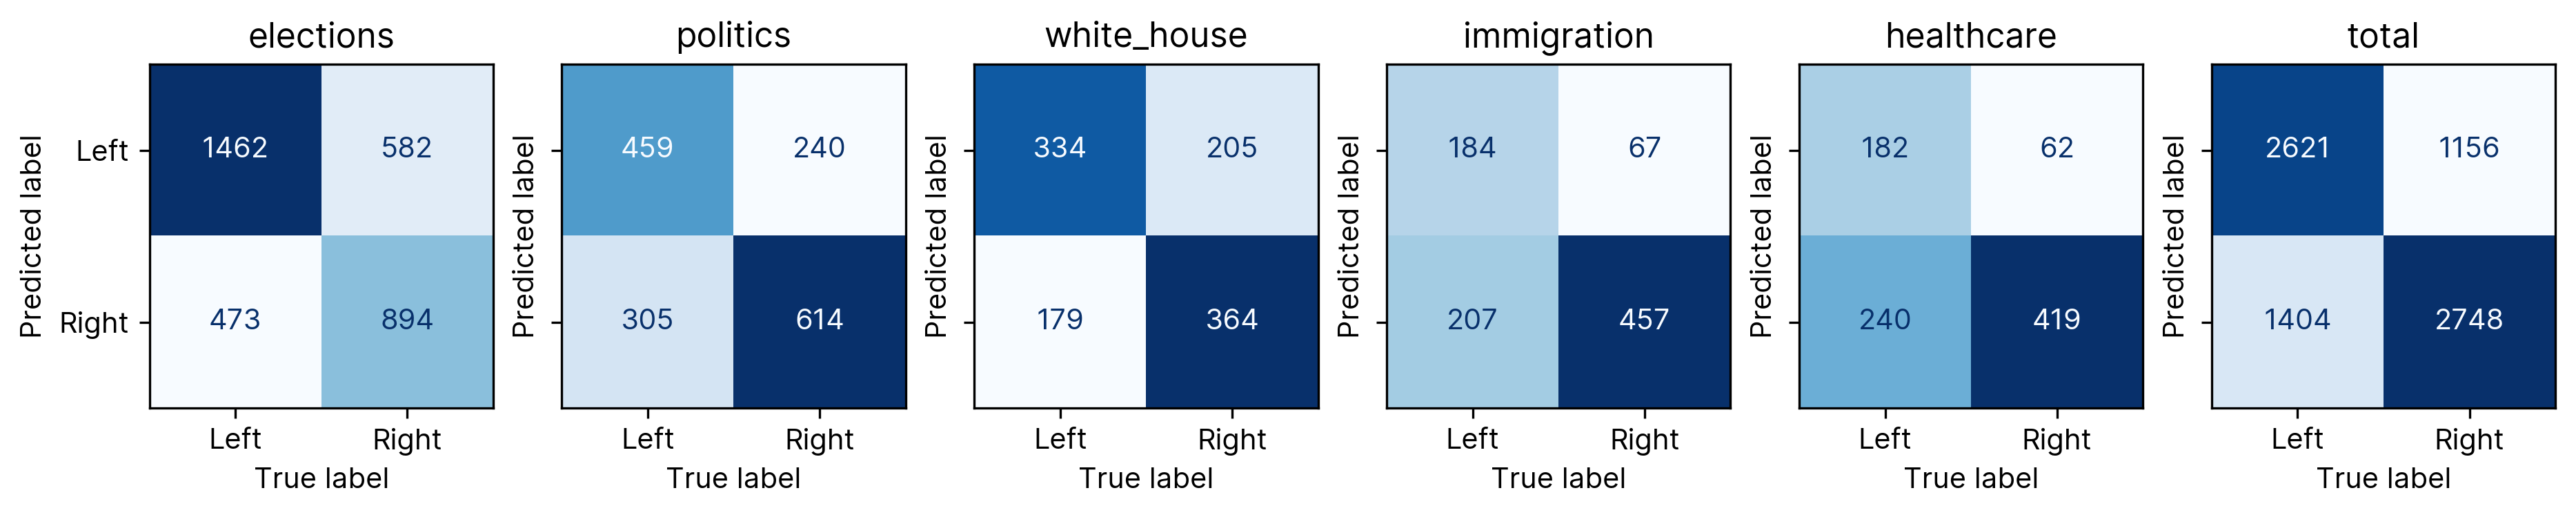

In [61]:
matrices_for_loads(lr_loads, lr_data_dir)